# Data science project

# Loan Approval Prediction Problem




Objectives:
- Perform the basic procedures of data preparation, cleaning, and EDA.

- Perform all the necessary feature engineering tasks to prepare the dataset.

- Explore the relationship and correlations between variables.

- Apply different classification models such as logistic regression, KNN, and SVM.

- Experiment with different parameters in SVM.

- Evaluate the model using the metrics.

#### Problem Description:
Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have given a problem to identify the customers segments, those are eligible for loan amount so that they can specifically target these customers. Here they have provided a partial data set.

In [ ]:
#first importing needed libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

In [ ]:
#Reading a csv file and preview data
loanData = pd.read_csv("loan prediction.csv")
loanData.head()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
loanData.info() #General information about the dataset
loanData.shape #number of rows=614, number of columns=13

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


(614, 13)

In [ ]:
#number of unique elements in each column
loanData.describe(include=['O'])

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,614,601,611,599,614,582,614,614
unique,614,2,2,4,2,2,3,2
top,LP001002,Male,Yes,0,Graduate,No,Semiurban,Y
freq,1,489,398,345,480,500,233,422


In [ ]:
#Statistical description of the numerical columns
loanData.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


# Data preparation and cleaning

In [ ]:
# finding any Missing values in the dataset
loanData.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
#filling  null values in Gender column with the frequent value of the column which is male
genderFrequent=loanData['Gender'].value_counts().idxmax()
print(genderFrequent)
loanData['Gender'].fillna(genderFrequent, inplace=True)
#checking that null values are filled
loanData['Gender'].isnull().sum()

Male


0

In [ ]:
#filling  null values in Married column with the frequent value of the column which is yes
MarriedFrequent=loanData['Married'].value_counts().idxmax()
print(MarriedFrequent)
loanData['Married'].fillna(MarriedFrequent, inplace=True)
#checking that null values are filled
loanData['Married'].isnull().sum()

Yes


0

In [ ]:
#filling  null values in Dependents column with the frequent value of the column which is 0
DependentsFrequent=loanData['Dependents'].value_counts().idxmax()
print(DependentsFrequent)
loanData['Dependents'].fillna(DependentsFrequent, inplace=True)
#checking that null values are filled
loanData['Dependents'].isnull().sum()

0


0

In [ ]:
#filling  null values in Self_Employed column with the frequent value of the column which is no
Self_EmployedFrequent=loanData['Self_Employed'].value_counts().idxmax()
print(Self_EmployedFrequent)
loanData['Self_Employed'].fillna(Self_EmployedFrequent, inplace=True)
#checking that null values are filled
loanData['Self_Employed'].isnull().sum()


No


0

In [ ]:
#filling  null values in LoanAmount column with the mean of the column which is 146.41
LoanAmountMean=loanData['LoanAmount'].mean(skipna=True)
LoanAmountRounded=round(LoanAmountMean,2)
print(LoanAmountRounded)
loanData['LoanAmount'].fillna(LoanAmountRounded, inplace=True)
#checking that null values are filled
loanData['LoanAmount'].isnull().sum()


146.41


0

In [ ]:
#filling  null values in Loan_Amount_Term column with the frequent value of the column which is 360
termFrequent=loanData['Loan_Amount_Term'].value_counts().idxmax()
print(termFrequent)
loanData['Loan_Amount_Term'].fillna(termFrequent, inplace=True)
#checking that null values are filled
loanData['Loan_Amount_Term'].isnull().sum()


360.0


0

In [ ]:
#filling  null values in Credit_History column with the frequent value of the column which is 1
historyFrequent=loanData['Credit_History'].value_counts().idxmax()
print(historyFrequent)
loanData['Credit_History'].fillna(historyFrequent, inplace=True)
#checking that null values are filled
loanData.isnull().sum()

1.0


Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [ ]:
#checking for duplicated records
sum(loanData.duplicated())

0

In [ ]:
#Convert Dependents column from object data type to int64
dependents_converted= {'0':0,'1':1,'2':2,'3+':3}
loanData['Dependents'].replace(dependents_converted,inplace=True)
loanData.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    int64  
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(2), object(7)
memory usage: 62.5+ KB


In [ ]:
#finding  incorrect or irrelevant values in numerical columns
print("Dependents minimum value: ",loanData['Dependents'].min())
print("ApplicantIncome minimum value: ",loanData['ApplicantIncome'].min())
print("CoapplicantIncome minimum value: ",loanData['CoapplicantIncome'].min())
print("LoanAmount minimum value: ",loanData['LoanAmount'].min())
print("Loan_Amount_Term minimum value: ",loanData['Loan_Amount_Term'].min())
print("Credit_History minimum value: ",loanData['Credit_History'].min())


Dependents minimum value:  0
ApplicantIncome minimum value:  150
CoapplicantIncome minimum value:  0.0
LoanAmount minimum value:  9.0
Loan_Amount_Term minimum value:  12.0
Credit_History minimum value:  0.0


# EDA

        counts  percentage%
Male       502    81.758958
Female     112    18.241042


<AxesSubplot:xlabel='Gender', ylabel='count'>

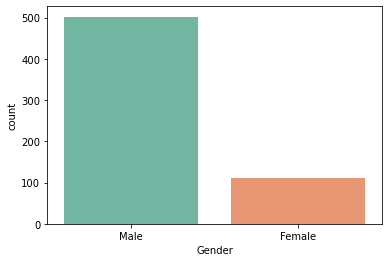

In [ ]:
#Number of people who applied for a loan group by gender:
c = loanData.Gender.value_counts()
p = loanData.Gender.value_counts(normalize=True) * 100
table=pd.concat([c,p], axis=1, keys=['counts', 'percentage%'])
print(table)
sns.countplot(x='Gender', data=loanData, palette = 'Set2')

     counts  percentage%
Yes     401    65.309446
No      213    34.690554


<AxesSubplot:xlabel='Married', ylabel='count'>

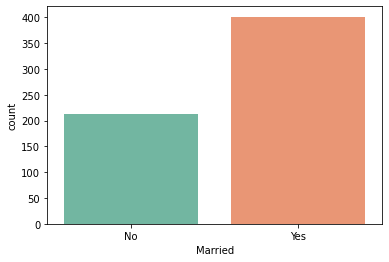

In [ ]:
#Number of people who applied for a loan group by martial status:
c = loanData.Married.value_counts()
p = loanData.Married.value_counts(normalize=True) * 100
table=pd.concat([c,p], axis=1, keys=['counts', 'percentage%'])
print(table)
sns.countplot(x='Married', data=loanData, palette = 'Set2')

   counts  percentage%
0     360    58.631922
1     102    16.612378
2     101    16.449511
3      51     8.306189


<AxesSubplot:xlabel='Dependents', ylabel='count'>

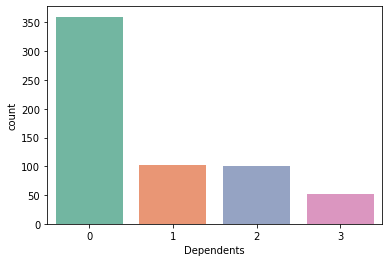

In [ ]:
#Number of people who applied for a loan group by Dependents:
c = loanData.Dependents.value_counts()
p = loanData.Dependents.value_counts(normalize=True) * 100
table=pd.concat([c,p], axis=1, keys=['counts', 'percentage%'])
print(table)
sns.countplot(x='Dependents', data=loanData, palette = 'Set2')

              counts  percentage%
Graduate         480    78.175896
Not Graduate     134    21.824104


<AxesSubplot:xlabel='Education', ylabel='count'>

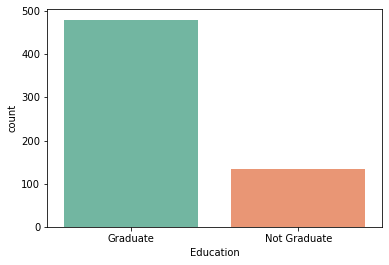

In [ ]:
#Number of people who applied for a loan group by Education:
c = loanData.Education.value_counts()
p = loanData.Education.value_counts(normalize=True) * 100
table=pd.concat([c,p], axis=1, keys=['counts', 'percentage%'])
print(table)
sns.countplot(x='Education', data=loanData, palette = 'Set2')

     counts  percentage%
No      532    86.644951
Yes      82    13.355049


<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

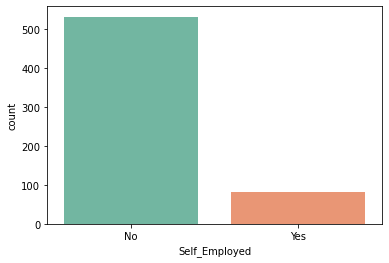

In [ ]:
#Number of people who applied for a loan group by Self_Employed:
c = loanData.Self_Employed.value_counts()
p = loanData.Self_Employed.value_counts(normalize=True) * 100
table=pd.concat([c,p], axis=1, keys=['counts', 'percentage%'])
print(table)
sns.countplot(x='Self_Employed', data=loanData, palette = 'Set2')

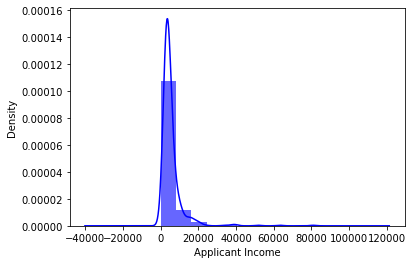

In [ ]:
#finding the range of all Applicants Income
ax = loanData["ApplicantIncome"].hist(density=True, color='blue', alpha=0.6)
loanData["ApplicantIncome"].plot(kind='density', color='blue')
ax.set(xlabel='Applicant Income')
plt.show()

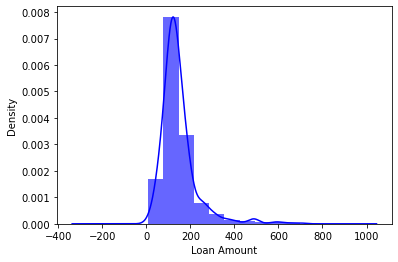

In [ ]:
#finding the range of Loan Amounts
ax = loanData["LoanAmount"].hist(density=True, stacked=True, color='blue', alpha=0.6)
loanData["LoanAmount"].plot(kind='density', color='blue')
ax.set(xlabel='Loan Amount')
plt.show()

       counts  percentage%
360.0     526    85.667752
180.0      44     7.166124
480.0      15     2.442997
300.0      13     2.117264
240.0       4     0.651466
84.0        4     0.651466
120.0       3     0.488599
60.0        2     0.325733
36.0        2     0.325733
12.0        1     0.162866


<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='count'>

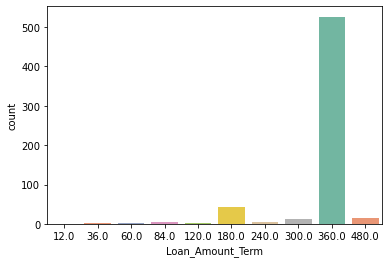

In [ ]:
 #Number of people who applied for a loan group by Loan_Amount_Term:
c = loanData.Loan_Amount_Term.value_counts()
p = loanData.Loan_Amount_Term.value_counts(normalize=True) * 100
table=pd.concat([c,p], axis=1, keys=['counts', 'percentage%'])
print(table)
sns.countplot(x='Loan_Amount_Term', data=loanData, palette = 'Set2')

     counts  percentage%
1.0     525    85.504886
0.0      89    14.495114


<AxesSubplot:xlabel='Credit_History', ylabel='count'>

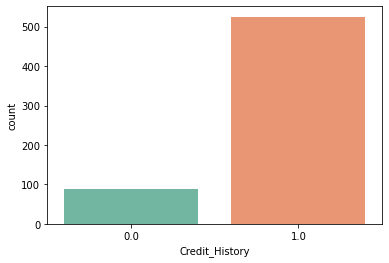

In [ ]:
#Number of people who applied for a loan group by Credit_History:
c = loanData.Credit_History.value_counts()
p = loanData.Credit_History.value_counts(normalize=True) * 100
table=pd.concat([c,p], axis=1, keys=['counts', 'percentage%'])
print(table)
sns.countplot(x='Credit_History', data=loanData, palette = 'Set2')

   counts  percentage%
Y     422    68.729642
N     192    31.270358


<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

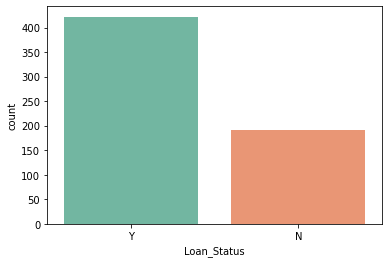

In [ ]:
#Number of approved and declined loans:
c = loanData.Loan_Status.value_counts()
p = loanData.Loan_Status.value_counts(normalize=True) * 100
table=pd.concat([c,p], axis=1, keys=['counts', 'percentage%'])
print(table)
sns.countplot(x='Loan_Status', data=loanData, palette = 'Set2')

# Necessary feature engineering

In [ ]:
#Convert  Gender data type to int64
gender_con = {"Female": 0, "Male": 1}
loanData['Gender'].replace(gender_con,inplace=True)
loanData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    int64  
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    int64  
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(3), object(6)
memory usage: 62.5+ KB


In [ ]:
#Convert Married data type to int64
Married_con = {'No' : 0,'Yes' : 1}
loanData['Married'].replace(Married_con,inplace=True)
loanData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    int64  
 2   Married            614 non-null    int64  
 3   Dependents         614 non-null    int64  
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(4), object(5)
memory usage: 62.5+ KB


In [ ]:
#Convert Education data type to int64
education_con = {'Not Graduate' : 0, 'Graduate' : 1}
loanData['Education'].replace(education_con,inplace=True)
loanData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    int64  
 2   Married            614 non-null    int64  
 3   Dependents         614 non-null    int64  
 4   Education          614 non-null    int64  
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(5), object(4)
memory usage: 62.5+ KB


In [ ]:
#Convert Property_Area data type to int64
property_con = {'Semiurban' : 0, 'Urban' : 1,'Rural' : 2}
loanData['Property_Area'].replace(property_con,inplace=True)
loanData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    int64  
 2   Married            614 non-null    int64  
 3   Dependents         614 non-null    int64  
 4   Education          614 non-null    int64  
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    int64  
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(6), object(3)
memory usage: 62.5+ KB


In [ ]:
#Convert Self_Employed data type to int64
Self_Employed_con = {'No' : 0,'Yes' : 1}
loanData['Self_Employed'].replace(Self_Employed_con,inplace=True)
loanData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    int64  
 2   Married            614 non-null    int64  
 3   Dependents         614 non-null    int64  
 4   Education          614 non-null    int64  
 5   Self_Employed      614 non-null    int64  
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    int64  
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(7), object(2)
memory usage: 62.5+ KB


In [ ]:
#Convert Loan_Status data type to int64
Loan_Status_con = {'N' : 0,'Y' : 1}
loanData['Loan_Status'].replace(Loan_Status_con,inplace=True)
loanData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    int64  
 2   Married            614 non-null    int64  
 3   Dependents         614 non-null    int64  
 4   Education          614 non-null    int64  
 5   Self_Employed      614 non-null    int64  
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    int64  
 12  Loan_Status        614 non-null    int64  
dtypes: float64(4), int64(8), object(1)
memory usage: 62.5+ KB


In [ ]:
#in this code we performed normalization using min-max approach
#normalization was applied on a copy of the dataset which is loanData2 in case we needed it in the classification part

Copy1=loanData.copy()
Copy2=loanData.copy()

Copy1=Copy1.drop(Copy1.columns[[0,1,2,3,4,5,10,11,12]],axis = 1)
print(Copy1)

for column in Copy1.columns:
    Copy1[column]=(Copy1[column]- Copy1[column].min())/(Copy1[column].max()- Copy1[column].min())

print(Copy1)

Copy2=Copy2.drop(Copy2.columns[[6,7,8,9]],axis = 1)
print(Copy2)

loanData2 = pd.concat([Copy1, Copy2], axis=1)
loanData2

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term
0               5849                0.0      146.41             360.0
1               4583             1508.0      128.00             360.0
2               3000                0.0       66.00             360.0
3               2583             2358.0      120.00             360.0
4               6000                0.0      141.00             360.0
..               ...                ...         ...               ...
609             2900                0.0       71.00             360.0
610             4106                0.0       40.00             180.0
611             8072              240.0      253.00             360.0
612             7583                0.0      187.00             360.0
613             4583                0.0      133.00             360.0

[614 rows x 4 columns]
     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term
0           0.070489           0.000000    0.198857          0.743

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status
0,0.070489,0.000000,0.198857,0.743590,LP001002,1,0,0,1,0,1.0,1,1
1,0.054830,0.036192,0.172214,0.743590,LP001003,1,1,1,1,0,1.0,2,0
2,0.035250,0.000000,0.082489,0.743590,LP001005,1,1,0,1,1,1.0,1,1
3,0.030093,0.056592,0.160637,0.743590,LP001006,1,1,0,0,0,1.0,1,1
4,0.072356,0.000000,0.191027,0.743590,LP001008,1,0,0,1,0,1.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0.034014,0.000000,0.089725,0.743590,LP002978,0,0,0,1,0,1.0,2,1
610,0.048930,0.000000,0.044863,0.358974,LP002979,1,1,3,1,0,1.0,2,1
611,0.097984,0.005760,0.353111,0.743590,LP002983,1,1,1,1,0,1.0,1,1
612,0.091936,0.000000,0.257598,0.743590,LP002984,1,1,2,1,0,1.0,1,1


# Relationships and correlation

<AxesSubplot:>

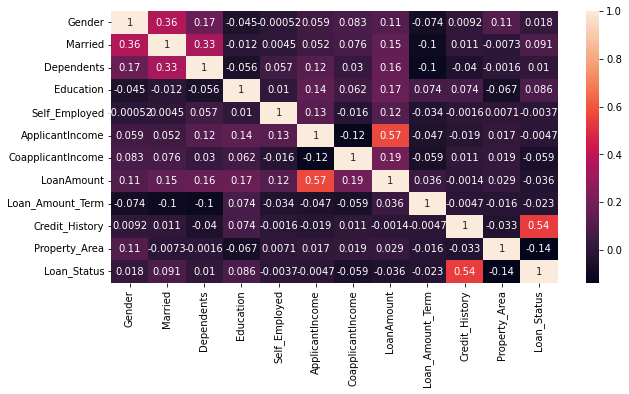

In [ ]:
#plotting correlations values between all variables and target class which is Loan_Status
plt.figure(figsize=(10,5))
sns.heatmap(loanData.corr(), annot=True)

In [ ]:
loanData.corr()[['Loan_Status']].sort_values(by='Loan_Status',ascending=False) #Finding correlation with the target class loan_status

,Loan_Status
Loan_Status,1.000000
Credit_History,0.540556
Married,0.091478
Education,0.085884
Gender,0.017987
Dependents,0.010118
Self_Employed,-0.003700
ApplicantIncome,-0.004710
Loan_Amount_Term,-0.022549
LoanAmount,-0.036416


In [ ]:
ss=loanData.groupby('Gender')['Loan_Status'].value_counts(normalize=False)
ee=loanData.groupby('Gender')['Loan_Status'].value_counts(normalize=True)*100
pd.concat([ss,ee], axis=1 , keys=['count','%']) ##calculate the percentage of the Loan_Status for each Gender

count          %
Gender Loan_Status                  
0      1               75  66.964286
       0               37  33.035714
1      1              347  69.123506
       0              155  30.876494

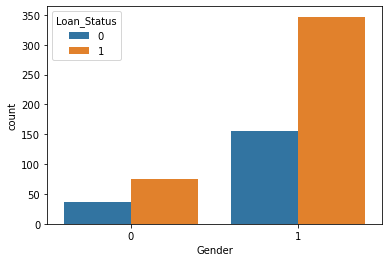

In [ ]:
#the relationship between the Loan_Status and  gender and we can see male have more accepted loan
sns.countplot(x='Gender', data=loanData,hue='Loan_Status');

In [ ]:
ss=loanData.groupby('Married')['Loan_Status'].value_counts(normalize=False)
ee=loanData.groupby('Married')['Loan_Status'].value_counts(normalize=True)*100
pd.concat([ss,ee], axis=1 , keys=['count','%'])

count          %
Married Loan_Status                  
0       1              134  62.910798
        0               79  37.089202
1       1              288  71.820449
        0              113  28.179551

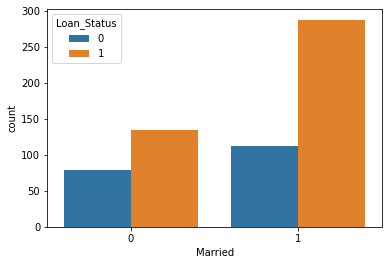

In [ ]:
#the relationship between the Loan_Status and Married and we can see Married people have more accepted loan
sns.countplot(x='Married', data=loanData,hue='Loan_Status');

In [ ]:
ss=loanData.groupby('Dependents')['Loan_Status'].value_counts(normalize=False)
ee=loanData.groupby('Dependents')['Loan_Status'].value_counts(normalize=True)*100
pd.concat([ss,ee], axis=1 , keys=['count','%'])

count          %
Dependents Loan_Status                  
0          1              247  68.611111
           0              113  31.388889
1          1               66  64.705882
           0               36  35.294118
2          1               76  75.247525
           0               25  24.752475
3          1               33  64.705882
           0               18  35.294118

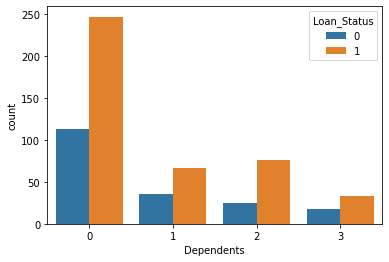

In [ ]:
#the relationship between the Loan_Status and Dependents and we can see zero dependents  have more accepted loan
sns.countplot(x='Dependents', data=loanData,hue='Loan_Status');

In [ ]:
ss=loanData.groupby('Education')['Loan_Status'].value_counts(normalize=False)
ee=loanData.groupby('Education')['Loan_Status'].value_counts(normalize=True)*100
pd.concat([ss,ee], axis=1 , keys=['count','%'])

count          %
Education Loan_Status                  
0         1               82  61.194030
          0               52  38.805970
1         1              340  70.833333
          0              140  29.166667

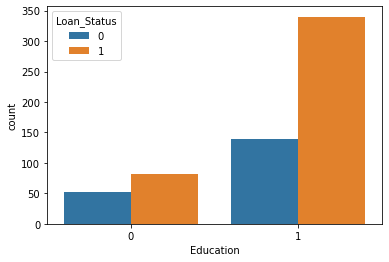

In [ ]:
#the relationship between the Loan_Status and Education and we can see Graduate people have more accepted loan
sns.countplot(x='Education', data=loanData,hue='Loan_Status');

In [ ]:
ss=loanData.groupby('Self_Employed')['Loan_Status'].value_counts(normalize=False)
ee=loanData.groupby('Self_Employed')['Loan_Status'].value_counts(normalize=True)*100
pd.concat([ss,ee], axis=1 , keys=['count','%'])

count          %
Self_Employed Loan_Status                  
0             1              366  68.796992
              0              166  31.203008
1             1               56  68.292683
              0               26  31.707317

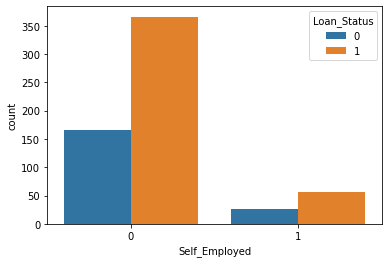

In [ ]:
#the relationship between the Loan_Status and Self_Employed
sns.countplot(x='Self_Employed', data=loanData,hue='Loan_Status');

In [ ]:
ss=loanData.groupby('Credit_History')['Loan_Status'].value_counts(normalize=False)
ee=loanData.groupby('Credit_History')['Loan_Status'].value_counts(normalize=True)*100
pd.concat([ss,ee], axis=1 , keys=['count','%'])

count          %
Credit_History Loan_Status                  
0.0            0               82  92.134831
               1                7   7.865169
1.0            1              415  79.047619
               0              110  20.952381

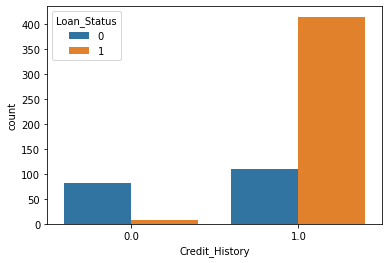

In [ ]:
#the relationship between the Loan_Status and Self_Employed
sns.countplot(x='Credit_History', data=loanData,hue='Loan_Status');

In [ ]:
ss=loanData.groupby('Married')['Gender'].value_counts(normalize=False)
ee=loanData.groupby('Married')['Gender'].value_counts(normalize=True)*100
pd.concat([ss,ee], axis=1 , keys=['count','%'])

count          %
Married Gender                  
0       1         133  62.441315
        0          80  37.558685
1       1         369  92.019950
        0          32   7.980050

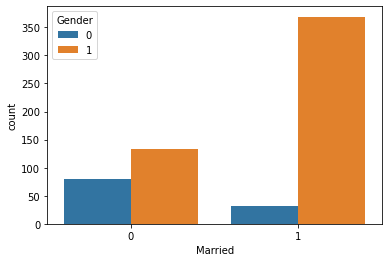

In [ ]:
#the relationship between the Self_Employed and Gender
sns.countplot(x='Married', data=loanData,hue='Gender');

<AxesSubplot:xlabel='Loan_Status', ylabel='CoapplicantIncome'>

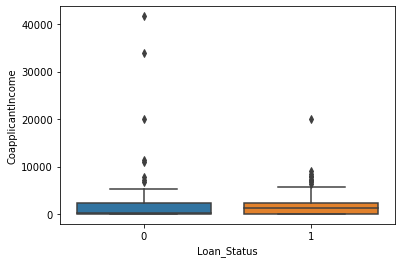

In [ ]:
#the relationship between the Loan_Status and CoapplicantIncome
sns.boxplot(x="Loan_Status", y="CoapplicantIncome", data=loanData)

<AxesSubplot:xlabel='Loan_Status', ylabel='ApplicantIncome'>

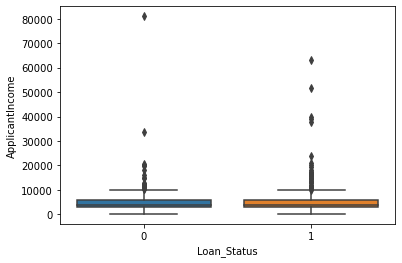

In [ ]:
#the relationship between the Loan_Status and ApplicantIncome
sns.boxplot(x="Loan_Status", y="ApplicantIncome", data=loanData)

<AxesSubplot:xlabel='Loan_Status', ylabel='LoanAmount'>

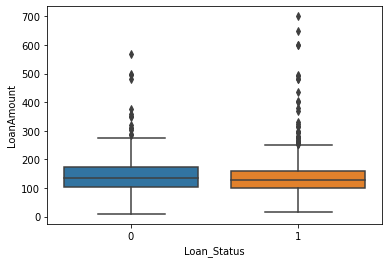

In [ ]:
#the relationship between the Loan_Status and LoanAmount
sns.boxplot(x="Loan_Status", y="LoanAmount", data=loanData)

<AxesSubplot:xlabel='Education', ylabel='LoanAmount'>

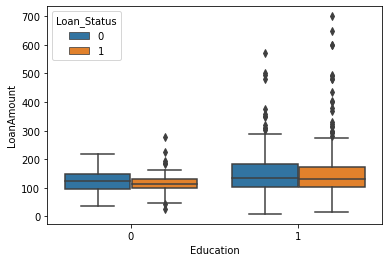

In [ ]:
#the relationship between the Loan_Status and LoanAmount and Education
sns.boxplot(x="Education", y="LoanAmount", data=loanData, hue="Loan_Status")

# Classification algorithms

# First algorithm: SVM

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
loanData2=loanData2.drop('Loan_ID',axis=1)
#we dropped Loan_ID column because its of type object and we don't need it in classification
loanData2.info()
#splitting data into 30% testing and 70% training
X_train, X_test, y_train, y_test = train_test_split(loanData2.drop('Loan_Status',axis=1),loanData2['Loan_Status'],
                                                    test_size=0.30)
print (X_train.shape,X_test.shape,y_train.shape, y_test.shape) #429=trainig, 185=testing

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ApplicantIncome    614 non-null    float64
 1   CoapplicantIncome  614 non-null    float64
 2   LoanAmount         614 non-null    float64
 3   Loan_Amount_Term   614 non-null    float64
 4   Gender             614 non-null    int64  
 5   Married            614 non-null    int64  
 6   Dependents         614 non-null    int64  
 7   Education          614 non-null    int64  
 8   Self_Employed      614 non-null    int64  
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    int64  
 11  Loan_Status        614 non-null    int64  
dtypes: float64(5), int64(7)
memory usage: 57.7 KB
(429, 11) (185, 11) (429,) (185,)


In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

SVM_model = SVC(gamma='auto') #Initialize SVM model, and automaticaly select gamma in the library SVC
SVM_model.fit(X_train, y_train) #fit=training the model
print('Accuracy of SVM classifier on test set: {:.2f}'.format(SVM_model.score(X_test, y_test))) #mean accuracy of the model

Accuracy of SVM classifier on test set: 0.83


In [ ]:
SVM_prediction = SVM_model.predict(X_test) #predict "class label" for sample in x
confusion_matrix = confusion_matrix(y_test, SVM_prediction) #comparing actual y with preticted y
print(confusion_matrix)

[[ 27  29]
 [  2 127]]


In [ ]:
print(classification_report(y_test, SVM_prediction)) # a reprot off all needed metrices

              precision    recall  f1-score   support

           0       0.93      0.48      0.64        56
           1       0.81      0.98      0.89       129

    accuracy                           0.83       185
   macro avg       0.87      0.73      0.76       185
weighted avg       0.85      0.83      0.81       185



#### Parameters tuning for SVC:


In [ ]:
from sklearn.model_selection import GridSearchCV
#setting parameters for C, gamma, and kernel is set to rbf=radial basis function
param_grid = {'C': [1,10, 50, 100,150, 500, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']}

#using GridSearchCV metohd to find best parametrs to be used in the model
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=3)

#trainig
grid.fit(X_train,y_train)

print ("Best parameters: ")
print (grid.best_params_) #Best values

Fitting 5 folds for each of 35 candidates, totalling 175 fits
[CV 1/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.779 total time=   0.0s
[CV 2/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.826 total time=   0.0s
[CV 3/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.733 total time=   0.0s
[CV 4/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.767 total time=   0.0s
[CV 5/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.753 total time=   0.0s
[CV 1/5] END ........C=1, gamma=0.1, kernel=rbf;, score=0.814 total time=   0.0s
[CV 2/5] END ........C=1, gamma=0.1, kernel=rbf;, score=0.837 total time=   0.0s
[CV 3/5] END ........C=1, gamma=0.1, kernel=rbf;, score=0.767 total time=   0.0s
[CV 4/5] END ........C=1, gamma=0.1, kernel=rbf;, score=0.791 total time=   0.0s
[CV 5/5] END ........C=1, gamma=0.1, kernel=rbf;, score=0.788 total time=   0.0s
[CV 1/5] END .......C=1, gamma=0.01, kernel=rbf;, score=0.674 total time=   0.0s
[CV 2/5] END .......C=1, gamma=0.01, kernel=rbf

[CV 5/5] END ........C=150, gamma=1, kernel=rbf;, score=0.765 total time=   0.0s
[CV 1/5] END ......C=150, gamma=0.1, kernel=rbf;, score=0.802 total time=   0.0s
[CV 2/5] END ......C=150, gamma=0.1, kernel=rbf;, score=0.733 total time=   0.0s
[CV 3/5] END ......C=150, gamma=0.1, kernel=rbf;, score=0.698 total time=   0.0s
[CV 4/5] END ......C=150, gamma=0.1, kernel=rbf;, score=0.767 total time=   0.0s
[CV 5/5] END ......C=150, gamma=0.1, kernel=rbf;, score=0.741 total time=   0.0s
[CV 1/5] END .....C=150, gamma=0.01, kernel=rbf;, score=0.814 total time=   0.0s
[CV 2/5] END .....C=150, gamma=0.01, kernel=rbf;, score=0.837 total time=   0.0s
[CV 3/5] END .....C=150, gamma=0.01, kernel=rbf;, score=0.767 total time=   0.0s
[CV 4/5] END .....C=150, gamma=0.01, kernel=rbf;, score=0.791 total time=   0.0s
[CV 5/5] END .....C=150, gamma=0.01, kernel=rbf;, score=0.788 total time=   0.0s
[CV 1/5] END ....C=150, gamma=0.001, kernel=rbf;, score=0.814 total time=   0.0s
[CV 2/5] END ....C=150, gamm

In [ ]:
SVM_model2 = SVC(kernel='rbf',C=1,gamma=0.1) #Initialize SVM model again with best parameters from the result of GridSearchCV
SVM_model2.fit(X_train, y_train) #fit=training the model
#mean accuracy of the model
print('Accuracy of SVM classifier after trying best parameters on test set: {:.2f}'.format(SVM_model2.score(X_test, y_test)))

Accuracy of SVM classifier after trying best parameters on test set: 0.83


In [ ]:
from sklearn.metrics import confusion_matrix
SVM_prediction = SVM_model2.predict(X_test) #predict "class label" for sample in x
confusion_matrix = confusion_matrix(y_test, SVM_prediction) #comparing actual y with preticted y
print(confusion_matrix)

[[ 27  29]
 [  2 127]]


In [ ]:
print(classification_report(y_test, SVM_prediction)) # a reprot off all needed metrices

              precision    recall  f1-score   support

           0       0.93      0.48      0.64        56
           1       0.81      0.98      0.89       129

    accuracy                           0.83       185
   macro avg       0.87      0.73      0.76       185
weighted avg       0.85      0.83      0.81       185



In [ ]:
#vary one parameter only which is C with all possiblities from 1 to 350
c_vals = list(range(1, 350)) #c value= array from one to 350

#Accuracy list
accuracy = [0 for i in range(349)] #loop from 1 to 350


#Loop through c_values
for i, c in enumerate(c_vals):
    #Create support vector machine object
    svc_model = SVC(C=c) #C=c

    #fit support vector machine model
    svc_model.fit(X_train, y_train)

    #Make predictions
    predictions = svc_model.predict(X_test)

    #add accuracy score to accuracy list
    accuracy[i] = accuracy_score(y_test, predictions)

print("Best C Value:", c_vals[accuracy.index(max(accuracy))])
print(accuracy)
print("Prediction Accuracy after trying all possiblities from 1 to 350 for C parameter: ", round(max(accuracy),2))

Best C Value: 1
[0.8324324324324325, 0.827027027027027, 0.827027027027027, 0.8162162162162162, 0.8162162162162162, 0.8162162162162162, 0.8162162162162162, 0.8162162162162162, 0.8054054054054054, 0.8054054054054054, 0.7945945945945946, 0.7783783783783784, 0.7675675675675676, 0.7621621621621621, 0.7621621621621621, 0.7351351351351352, 0.7297297297297297, 0.7243243243243244, 0.7243243243243244, 0.7243243243243244, 0.7189189189189189, 0.7189189189189189, 0.7243243243243244, 0.7243243243243244, 0.7243243243243244, 0.7243243243243244, 0.7189189189189189, 0.7189189189189189, 0.7189189189189189, 0.7189189189189189, 0.7189189189189189, 0.7189189189189189, 0.7189189189189189, 0.7243243243243244, 0.7243243243243244, 0.7243243243243244, 0.7243243243243244, 0.7243243243243244, 0.7297297297297297, 0.7297297297297297, 0.7297297297297297, 0.7297297297297297, 0.7297297297297297, 0.7297297297297297, 0.7297297297297297, 0.7297297297297297, 0.7297297297297297, 0.7243243243243244, 0.7243243243243244, 0.724

In [ ]:
SVM_model3 = SVC(C=1) #Initialize SVM model again with c=1
SVM_model3.fit(X_train, y_train) #fit=training the model
#mean accuracy of the model
print('Accuracy of SVM classifier after trying best value for c parameter on test set: {:.2f}'.format(SVM_model3.score(X_test, y_test)))

Accuracy of SVM classifier after trying best value for c parameter on test set: 0.83


# second algorithm: KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5) #initialize KNN model
classifier.fit(X_train, y_train) #fit=training the model
print('Accuracy of KNN classifier on test set: {:.2f}'.format(classifier.score(X_test, y_test))) #mean accuracy of the model

Accuracy of KNN classifier on test set: 0.77


In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 25  31]
 [ 11 118]]
              precision    recall  f1-score   support

           0       0.69      0.45      0.54        56
           1       0.79      0.91      0.85       129

    accuracy                           0.77       185
   macro avg       0.74      0.68      0.70       185
weighted avg       0.76      0.77      0.76       185



In [ ]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test, y_pred)
cm

array([[ 25,  31],
       [ 11, 118]], dtype=int64)

# Third algorithm: Logistic Regressiom

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

logreg = LogisticRegression() #initialize Logistic Regression model
logreg.fit(X_train, y_train) #fit=training the model
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test))) #mean accuracy of the model

Accuracy of logistic regression classifier on test set: 0.83


In [ ]:
LR_prediction = logreg.predict(X_test)
confusion_matrix = confusion_matrix(y_test.tolist(), LR_prediction.tolist())
print(confusion_matrix)

[[ 28  28]
 [  3 126]]


In [ ]:
print(classification_report(y_test, LR_prediction))

              precision    recall  f1-score   support

           0       0.90      0.50      0.64        56
           1       0.82      0.98      0.89       129

    accuracy                           0.83       185
   macro avg       0.86      0.74      0.77       185
weighted avg       0.84      0.83      0.82       185



# Cross-validation for all models

In [ ]:
#To evaluate the perfprmance of all the models, We will use cross-validation by applying each model n times for different training and testing samples
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

models = [] #array that contains all the models
models.append(('SVM', SVC(gamma='auto')))
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('KNN', KNeighborsClassifier()))

# evaluate each model in turn, we have 3 models which are LR, KNN and SVM
results = [] #array that contains the result accuracy of all models
names = [] #array that contains the names of all models
for name, model in models: #loop to go through all the 3 models
    kfold = StratifiedKFold(n_splits=15, random_state=1, shuffle=True) #Repeats Stratified K-Fold 15 times
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy') #cross validiation
    results.append(cv_results)
    names.append(name)

    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std())) #the mean accuracy for each model and the SD

SVM: 0.799425 (0.054976)
LR: 0.792447 (0.045396)
KNN: 0.743268 (0.074088)


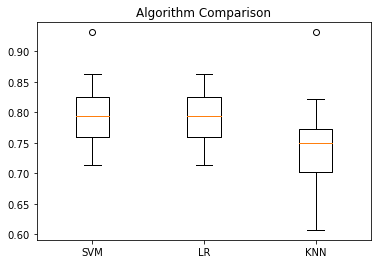

In [ ]:
# Compare all models accuracy using a boxplot
plt.boxplot(results, labels=names)
plt.title('Algorithm Comparison')
plt.show()